<a href="https://colab.research.google.com/github/Sanskruti06/Restaurant-Sentiment-Analysis/blob/main/Sentiment_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')
pd.set_option('display.max_colwidth', 100)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
...,...,...
995,I think food should have flavor and texture and both were lacking.,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go back.,0
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0


In [40]:
n = df.shape[0]
print('Rows:', n)

Rows: 1000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [29]:
# Checking for null values

df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [30]:
df.sort_values(by=['Liked'], ascending = False).head()

,Review,Liked
0,Wow... Loved this place.,1
464,The inside is really quite nice and very clean.,1
499,Waitress was sweet and funny.,1
502,Cant say enough good things about this place.,1
503,The ambiance was incredible.,1


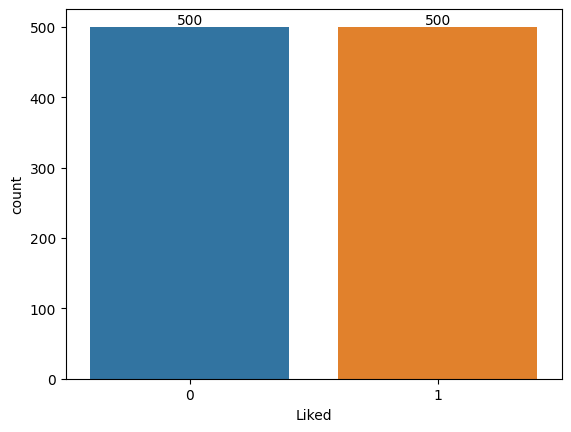

In [31]:
# plot distribution of positive/negative reviews

# positive = 1
# negative = 0

ax = sns.countplot(x = 'Liked', data = df)
for bars in ax.containers:
  ax.bar_label(bars)

In [32]:
sia = SentimentIntensityAnalyzer()

df['positive'] = 0
df['neutral'] = 0
df['negative'] = 0
df['compound'] = 0

for i in range(0,n):
    current_text = df.Review[i]
    sent = sia.polarity_scores(current_text)
    df.loc[i, 'positive'] = sent['pos']
    df.loc[i, 'neutral'] = sent['neu']
    df.loc[i, 'negative'] = sent['neg']
    df.loc[i, 'compound'] = sent['compound']

df

,Review,Liked,positive,neutral,negative,compound
0,Wow... Loved this place.,1,0.565,0.435,0.000,0.5994
1,Crust is not good.,0,0.000,0.555,0.445,-0.3412
2,Not tasty and the texture was just nasty.,0,0.000,0.660,0.340,-0.5574
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,0.322,0.585,0.093,0.6908
4,The selection on the menu was great and so were the prices.,1,0.272,0.728,0.000,0.6249
...,...,...,...,...,...,...
995,I think food should have flavor and texture and both were lacking.,0,0.000,1.000,0.000,0.0000
996,Appetite instantly gone.,0,0.000,1.000,0.000,0.0000
997,Overall I was not impressed and would not go back.,0,0.000,0.758,0.242,-0.3724
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0,0.000,1.000,0.000,0.0000


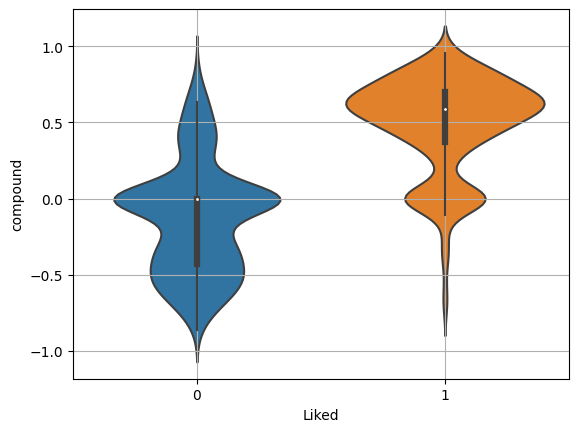

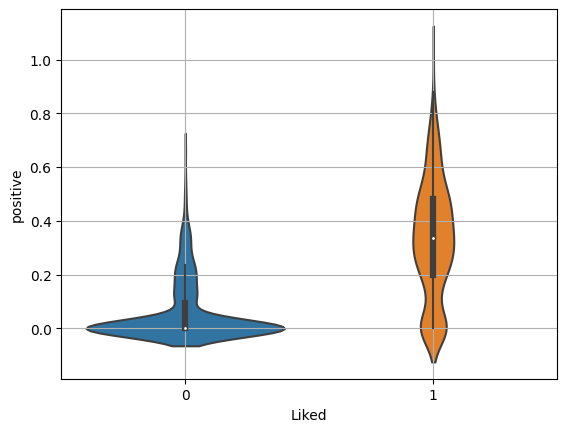

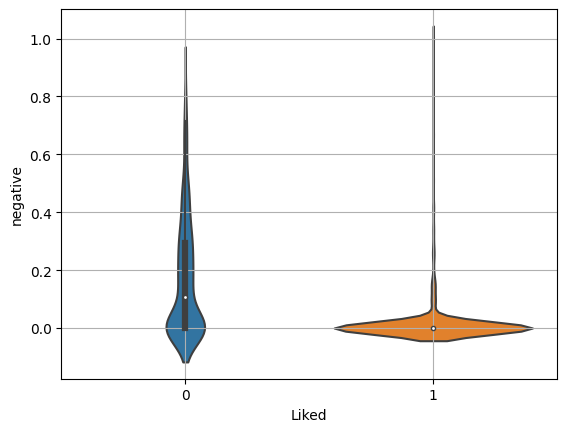

In [33]:
# compare values for positive vs negative reviews

sns.violinplot(data=df, x='Liked', y='compound')
plt.grid()
plt.show()

sns.violinplot(data=df, x='Liked', y='positive')
plt.grid()
plt.show()

sns.violinplot(data=df, x='Liked', y='negative')
plt.grid()
plt.show()

In [34]:
# highest sentiment scores
df.nlargest(n=10, columns='compound')

,Review,Liked,positive,neutral,negative,compound
537,"Great steak, great sides, great wine, amazing desserts.",1,0.801,0.199,0.0,0.9524
585,Great food and great service in a clean and friendly setting.,1,0.701,0.299,0.0,0.9337
603,"Good value, great food, great service.",1,0.871,0.129,0.0,0.9260
715,Only Pros : Large seating area/ Nice bar area/ Great simple drink menu/ The BEST brick oven pizz...,1,0.416,0.584,0.0,0.9205
456,"The food was very good and I enjoyed every mouthful, an enjoyable relaxed venue for couples smal...",1,0.462,0.538,0.0,0.9162
629,"The staff is always super friendly and helpful, which is especially cool when you bring two smal...",1,0.444,0.556,0.0,0.9150
55,"Loved it...friendly servers, great food, wonderful and imaginative menu.",1,0.661,0.339,0.0,0.9136
872,"All in all an excellent restaurant highlighted by great service, a unique menu, and a beautiful ...",1,0.494,0.506,0.0,0.9136
598,I really enjoyed Crema Café before they expanded. I even told friends they had the BEST breakfast.,1,0.492,0.508,0.0,0.9123
517,"At first glance it is a lovely bakery cafe - nice ambiance, clean, friendly staff.",1,0.581,0.419,0.0,0.9100


In [35]:
# lowest sentiment scores
df.nsmallest(n=10, columns='compound')

,Review,Liked,positive,neutral,negative,compound
289,"I hate to disagree with my fellow Yelpers, but my husband and I were so disappointed with this p...",0,0.0,0.592,0.408,-0.8637
44,"Frozen pucks of disgust, with some of the worst people behind the register.",0,0.0,0.579,0.421,-0.8402
492,"Worse of all, he humiliated his worker right in front of me..Bunch of horrible name callings.",0,0.0,0.591,0.409,-0.8402
379,"The staff are now not as friendly, the wait times for being served are horrible, no one even say...",0,0.0,0.725,0.275,-0.8089
926,"It was so bad, I had lost the heart to finish it.",0,0.0,0.561,0.439,-0.7938
46,It's too bad the food is so damn generic.,0,0.0,0.500,0.500,-0.7900
967,Hell no will I go back,0,0.0,0.306,0.694,-0.7783
336,First - the bathrooms at this location were dirty- Seat covers were not replenished & just plain...,0,0.0,0.680,0.320,-0.7633
495,And then tragedy struck.,0,0.0,0.238,0.762,-0.7506
121,"Worst service to boot, but that is the least of their worries.",0,0.0,0.615,0.385,-0.7391


In [36]:
# Wordcloud

df_pos = df[df.Liked==1]
df_neg = df[df.Liked==0]

In [37]:
stopwords_cloud = set(STOPWORDS)

POSITIVE REVIEWS:


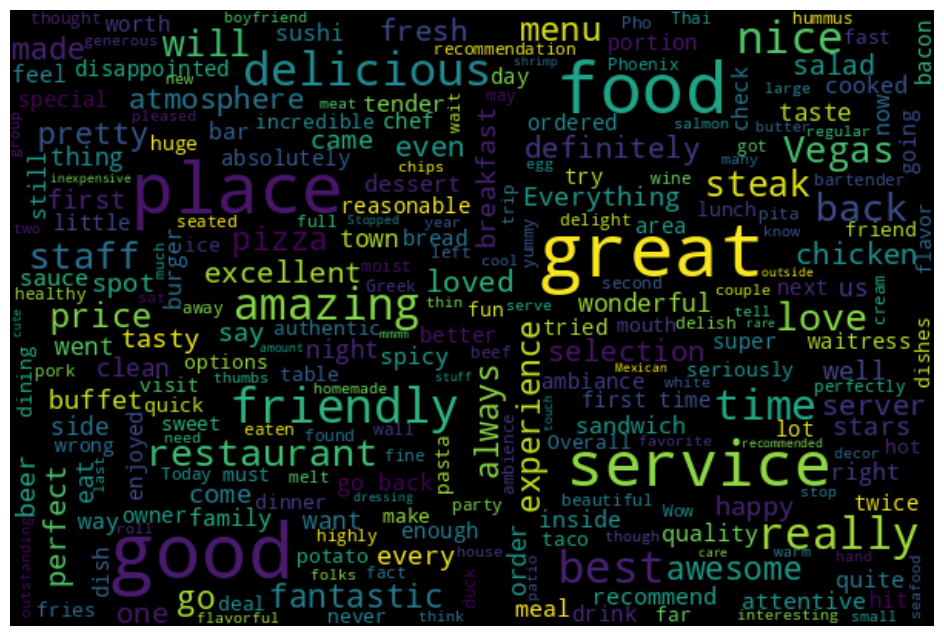

In [38]:
# WordCloud for poitive reviews

text = " ".join(xx for xx in df_pos.Review)
wordcloud = WordCloud(stopwords=stopwords_cloud, max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text)
print('POSITIVE REVIEWS:')
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NEGATIVE REVIEWS:


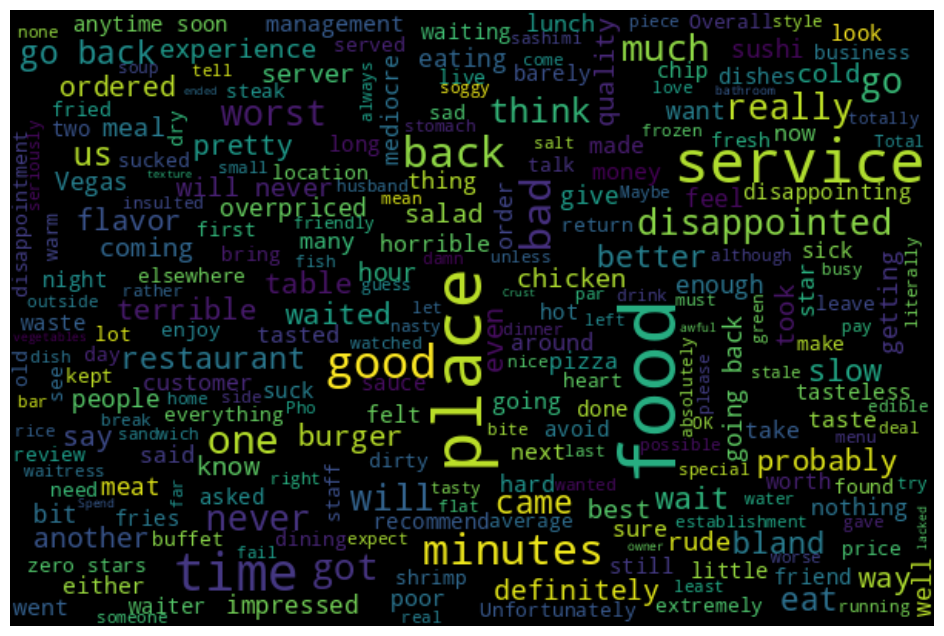

In [39]:
# WordCloud for negative reviews

text = " ".join(xx for xx in df_neg.Review)
wordcloud = WordCloud(stopwords=stopwords_cloud, max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text)
print('NEGATIVE REVIEWS:')
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()